<a href="https://colab.research.google.com/github/fardsnog2/Films_Analysis/blob/master/films_bpm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Фильмы

In [ ]:
import re
import pandas as pd
import plotly.express as px
import seaborn as sns
import plotly.graph_objs as go
!pip uninstall xlrd
!pip install xlrd
#isin

Found existing installation: xlrd 1.1.0
Uninstalling xlrd-1.1.0:
  Would remove:
    /usr/local/bin/runxlrd.py
    /usr/local/lib/python3.7/dist-packages/xlrd-1.1.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/xlrd/*
Proceed (y/n)? y
  Successfully uninstalled xlrd-1.1.0
     |████████████████████████████████| 96 kB 3.8 MB/s 


In [ ]:
films=pd.read_excel('/content/moviedb_first.xls')
# films=pd.read_excel('/content/sample_data/moviedb_first.xls')
#films=pd.read_csv('/content/moviedb.xlsx - Sheet1.csv')
#films['rating']=films['rating'].str.replace(',','.')
#films['rating']=films['rating'].astype('float64')
films.head(10)

,Unnamed: 0,title,release,runtime,budget,revenue,lang,genre1,genre2,country1,...,writer,studio1,studio2,keyword1,keyword2,keyword3,keyword4,keyword5,keyword6,rating
0,0,"""Vegeta"" (Shrek)",NaN,99.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,1,'93: Del Soul,2021-07-18 00:00:00,15.0,250.0,NaN,en,детектив,триллер,NaN,...,Riley Lockhart,Elkman Productions,NaN,sports car,psychological stress,axe murder,horror filmmaking,1990s,carsploitation,2.0
2,2,'Catch Me If You Can': Behind the Camera,2003-05-06 00:00:00,17.0,NaN,NaN,NaN,документальный,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.7
3,3,'Harry Potter': Behind the Magic,2005-11-19 00:00:00,48.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
4,4,"'Oh, Miss Jones!': The Very Best of Leonard Ro...",1996-08-16 00:00:00,52.0,NaN,NaN,en,документальный,NaN,GB,...,NaN,Telegram,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
5,5,'Topaz': An Appreciation by Film Critic/Histor...,2001-03-06 00:00:00,29.0,NaN,NaN,en,документальный,NaN,NaN,...,Laurent Bouzereau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.3
6,6,...One Third of a Nation...,1939-02-10 00:00:00,79.0,NaN,NaN,en,драма,NaN,US,...,Dudley Murphy Productions,NaN,fire,tenement,NaN,NaN,NaN,NaN,NaN,6.3
7,7,007: Живи и дай умереть,1973-07-05 00:00:00,121.0,7000000.0,161777836.0,en,приключения,боевик,GB,...,United Artists,Eon Productions,"london, england",new york city,bomb,england,spy,sheriff,based on novel or book,6.5
8,8,007: Завтра не умрёт никогда,1997-12-11 00:00:00,119.0,110000000.0,333011068.0,de,приключения,боевик,GB,...,Eon Productions,United Artists,"london, england",england,spy,china,intelligence,television,missile,6.3
9,9,007: Казино Рояль,39035,139.0,150000000.0,599045960.0,en,приключения,боевик,DE,...,Eon Productions,Stillking Films,italy,poker,casino,based on novel or book,terrorist,banker,money,7.5


In [ ]:
films['profit']=films['revenue']-films['budget']
films.head()

,Unnamed: 0,title,release,runtime,budget,revenue,lang,genre1,genre2,country1,...,studio1,studio2,keyword1,keyword2,keyword3,keyword4,keyword5,keyword6,rating,profit
0,0,"""Vegeta"" (Shrek)",NaN,99.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,1,'93: Del Soul,2021-07-18 00:00:00,15.0,250.0,NaN,en,детектив,триллер,NaN,...,Elkman Productions,NaN,sports car,psychological stress,axe murder,horror filmmaking,1990s,carsploitation,2.0,NaN
2,2,'Catch Me If You Can': Behind the Camera,2003-05-06 00:00:00,17.0,NaN,NaN,NaN,документальный,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.7,NaN
3,3,'Harry Potter': Behind the Magic,2005-11-19 00:00:00,48.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN
4,4,"'Oh, Miss Jones!': The Very Best of Leonard Ro...",1996-08-16 00:00:00,52.0,NaN,NaN,en,документальный,NaN,GB,...,Telegram,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN


In [ ]:
films.info()
films.head(30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10430 entries, 0 to 10429
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    10430 non-null  int64  
 1   Unnamed: 0.1  10430 non-null  int64  
 2   title         10430 non-null  object 
 3   release       10168 non-null  object 
 4   runtime       10278 non-null  float64
 5   budget        4209 non-null   float64
 6   revenue       4200 non-null   float64
 7   lang          9117 non-null   object 
 8   genre1        9467 non-null   object 
 9   genre2        6691 non-null   object 
 10  country1      8889 non-null   object 
 11  country2      2154 non-null   object 
 12  actor1        9423 non-null   object 
 13  actor2        9136 non-null   object 
 14  actor3        8895 non-null   object 
 15  actor4        8681 non-null   object 
 16  actor5        8443 non-null   object 
 17  director      9723 non-null   object 
 18  writer        7110 non-nul

,Unnamed: 0,Unnamed: 0.1,title,release,runtime,budget,revenue,lang,genre1,genre2,...,studio1,studio2,keyword1,keyword2,keyword3,keyword4,keyword5,keyword6,rating,profit
0,0,0,"""Vegeta"" (Shrek)",NaN,99.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
1,1,1,'93: Del Soul,2021-07-18 00:00:00,15.0,250.0,NaN,en,детектив,триллер,...,Elkman Productions,NaN,sports car,psychological stress,axe murder,horror filmmaking,1990s,carsploitation,2.000000,NaN
2,2,2,'Catch Me If You Can': Behind the Camera,2003-05-06 00:00:00,17.0,NaN,NaN,NaN,документальный,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.700000,NaN
3,3,3,'Harry Potter': Behind the Magic,2005-11-19 00:00:00,48.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN
4,4,4,"'Oh, Miss Jones!': The Very Best of Leonard Ro...",1996-08-16 00:00:00,52.0,NaN,NaN,en,документальный,NaN,...,Telegram,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN
5,5,5,'Topaz': An Appreciation by Film Critic/Histor...,2001-03-06 00:00:00,29.0,NaN,NaN,en,документальный,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.300000,NaN
6,6,6,...One Third of a Nation...,1939-02-10 00:00:00,79.0,NaN,NaN,en,драма,NaN,...,NaN,fire,tenement,NaN,NaN,NaN,NaN,NaN,6.300000,NaN
7,7,7,007: Живи и дай умереть,1973-07-05 00:00:00,121.0,7000000.0,1.617778e+08,en,приключения,боевик,...,Eon Productions,"london, england",new york city,bomb,england,spy,sheriff,based on novel or book,6.500000,154777836.0
8,8,8,007: Завтра не умрёт никогда,1997-12-11 00:00:00,119.0,110000000.0,3.330111e+08,de,приключения,боевик,...,United Artists,"london, england",england,spy,china,intelligence,television,missile,6.300000,223011068.0
9,9,9,007: Казино Рояль,39035,139.0,150000000.0,5.990460e+08,en,приключения,боевик,...,Stillking Films,italy,poker,casino,based on novel or book,terrorist,banker,money,7.500000,449045960.0


In [ ]:
#среднее значение
countries={'JP':'Япония', 'AR':'Аргентина', 'AU':'Австралия', 'BE':'Бельгия', 'BR':'Бразилия', 'CA':'Канада', 'CN':'Китай', 'DE':'Германия', 'DK':'Дания', 'ES':'Испания', 'FR':'Франция', 'GB':'Соединенное Королевство', 'HK':'Гонконг', 'IE':'Ирландия', 'IN':'Индия', 'IT':'Италия', 'KR':'Корея', 'MX':'Мексика', 'RU':'Россия', 'US':'Соединенные Штаты',}
films['country1']=films['country1'].map(countries)
films['profit']=films['profit']/1000000
films['revenue']=films['revenue']/1000000
films['budget']=films['budget']/1000000
avg_rating = films.groupby(['genre1']).agg({
  "rating": "mean",
}).reset_index()
fig = px.bar(avg_rating, 
                 x='genre1', 
                 y='rating', 
                 title='Средние значения рейтинга по жанрам1')
fig.show()


In [ ]:
avg_rating = films.groupby(['genre1']).agg({
  "rating": "mean",
}).reset_index()
avg_rating=avg_rating.sort_values(by='rating')
avg_rating=avg_rating.iloc[14:19, 0:2]
fig = px.bar(avg_rating, 
                 x='genre1', 
                 y='rating', 
                 title='5 самых лучших по рейтингу жанров')
fig.show()

In [ ]:
avg_rating = films.groupby(['genre1']).agg({
  "rating": "mean",
}).reset_index()
avg_rating=avg_rating.sort_values(by='rating')
avg_rating=avg_rating.iloc[0:5, 0:2]
fig = px.bar(avg_rating, 
                 x='genre1', 
                 y='rating', 
                 title='5 самых худших по рейтингу жанров')
fig.show()

In [ ]:
#20 самых популярных стран
#value_counts()

count_country=films['country1'].value_counts().head(20)
index_test = count_country.index
df = pd.DataFrame() 
df=films.loc[films['country1'].isin(index_test)]


avg_rating_country = df.groupby(['country1']).agg({
  "rating": "mean",
}).reset_index()
fig = px.bar(avg_rating_country, 
                 x='country1', 
                 y='rating', 
                 title='Средние значения рейтинга по странам1')
fig.show()

In [ ]:
avg_rating_country = films.groupby(['country1']).agg({
  "rating": "mean",
}).reset_index()
avg_rating_country=avg_rating_country.sort_values(by='rating')
avg_rating_country=avg_rating_country.iloc[0:5, 0:2]
fig = px.bar(avg_rating_country, 
                 x='country1', 
                 y='rating', 
                 title='5 самых худших стран по рейтингу')
fig.show()

In [ ]:
avg_rating_country = films.groupby(['country1']).agg({
  "rating": "mean",
}).reset_index()
avg_rating_country=avg_rating_country.sort_values(by='rating')
avg_rating_country=avg_rating_country.iloc[15:20, 0:2]
fig = px.bar(avg_rating_country, 
                 x='country1', 
                 y='rating', 
                 title='5 самых лучших стран по рейтингу')
fig.show()

In [ ]:
avg_profit = films.groupby(['genre1']).agg({
  "profit": "mean",
}).reset_index()
print(avg_profit)
fig = px.bar(avg_profit, 
                 x='genre1', 
                 y='profit', 
                 title='Средние значения прибыли по жанрам1')

fig.show()

                 genre1      profit
0                боевик  142.513626
1               вестерн   24.177103
2               военный   58.311046
3              детектив   55.349174
4        документальный   26.061328
5                 драма   42.356499
6               история   60.291658
7               комедия   58.326696
8              криминал   47.369489
9             мелодрама   54.005391
10               музыка   99.558418
11           мультфильм  195.651169
12          приключения  203.685090
13             семейный  199.691766
14  телевизионный фильм         NaN
15              триллер   61.239972
16                ужасы   52.276012
17           фантастика  157.151125
18              фэнтези  114.294529


In [ ]:
avg_profit = films.groupby(['genre1']).agg({
  "profit": "mean",
}).reset_index()
avg_profit=avg_profit.sort_values(by='profit')
print(avg_profit)
avg_profit=avg_profit.iloc[13:18, 0:2]
fig = px.bar(avg_profit, 
                 x='genre1', 
                 y='profit', 
                 title='5 самых лучших по прибыли жанров')
fig.show()

                 genre1      profit
1               вестерн   24.177103
4        документальный   26.061328
5                 драма   42.356499
8              криминал   47.369489
16                ужасы   52.276012
9             мелодрама   54.005391
3              детектив   55.349174
2               военный   58.311046
7               комедия   58.326696
6               история   60.291658
15              триллер   61.239972
10               музыка   99.558418
18              фэнтези  114.294529
0                боевик  142.513626
17           фантастика  157.151125
11           мультфильм  195.651169
13             семейный  199.691766
12          приключения  203.685090
14  телевизионный фильм         NaN


In [ ]:
avg_profit = films.groupby(['genre1']).agg({
  "profit": "mean",
}).reset_index()
avg_profit=avg_profit.sort_values(by='profit')
avg_profit=avg_profit.iloc[0:5, 0:2]
fig = px.bar(avg_profit, 
                 x='genre1', 
                 y='profit', 
                 title='5 самых худших по прибыли жанров')
fig.show()

In [ ]:

avg_profit_country = films.groupby(['country1']).agg({
  "profit": "mean",
}).reset_index()

fig = px.bar(avg_profit_country, 
                 x='country1', 
                 y='profit', 
                 title='Средние значения прибыли по странам')

fig.show()

In [ ]:
avg_profit_country = films.groupby(['country1']).agg({
  "profit": "mean",
}).reset_index()
avg_profit_country=avg_profit_country.sort_values(by='profit')
avg_profit_country=avg_profit_country.iloc[0:5, 0:2]
fig = px.bar(avg_profit_country, 
                 x='country1', 
                 y='profit', 
                 title='5 самых худших по прибыли стран')
fig.show()

In [ ]:
avg_profit_country = films.groupby(['country1']).agg({
  "profit": "mean",
}).reset_index()
avg_profit_country=avg_profit_country.sort_values(by='profit')
avg_profit_country=avg_profit_country.iloc[15:21, 0:2]
fig = px.bar(avg_profit_country, 
                 x='country1', 
                 y='profit', 
                 title='5 самых лучших по прибыли стран')
fig.show()


In [ ]:
avg_revenue_genre = films.groupby(['genre1']).agg({
  "revenue": "mean",
}).reset_index()
fig = px.bar(avg_revenue_genre, 
                 x='genre1', 
                 y='revenue', 
                 title='Средние значения сборов по жанрам')
fig.show()


In [ ]:
avg_revenue_genre_5_best = films.groupby(['genre1']).agg({
  "revenue": "mean",
}).reset_index()
avg_revenue_genre_5_best=avg_revenue_genre_5_best.sort_values(by='revenue')
avg_revenue_genre_5_best=avg_revenue_genre_5_best.iloc[13:18, 0:2]
fig = px.bar(avg_revenue_genre_5_best, 
                 x='genre1', 
                 y='revenue', 
                 title='5 лучших жанров по кассовым сборам')
fig.show()


In [ ]:
avg_revenue_genre_5_worst = films.groupby(['genre1']).agg({
  "revenue": "mean",
}).reset_index()
avg_revenue_genre_5_worst=avg_revenue_genre_5_worst.sort_values(by='revenue')
avg_revenue_genre_5_worst=avg_revenue_genre_5_worst.iloc[0:5, 0:2]
fig = px.bar(avg_revenue_genre_5_worst, 
                 x='genre1', 
                 y='revenue', 
                 title='5 худших жанров по кассовым сборам')
fig.show()


In [ ]:
films=films[films['revenue']>0]

avg_revenue_country = films.groupby(['country1']).agg({
  "revenue": "mean",
}).reset_index()


fig = px.bar(avg_revenue_country, 
                 x='country1', 
                 y='revenue', 
                 title='Средние значения кассовых сборов по странам')
fig.show()

In [ ]:
avg_revenue_country_5_best = films.groupby(['country1']).agg({
  "revenue": "mean",
}).reset_index()
avg_revenue_country_5_best=avg_revenue_country_5_best.sort_values(by='revenue')
avg_revenue_country_5_best=avg_revenue_country_5_best.iloc[14:19, 0:2]
fig = px.bar(avg_revenue_country_5_best, 
                 x='country1', 
                 y='revenue', 
                 title='5 лучших стран по кассовым сборам')
fig.show()

In [ ]:
avg_revenue_country_5_worst = films.groupby(['country1']).agg({
  "revenue": "mean",
}).reset_index()
avg_revenue_country_5_worst=avg_revenue_country_5_worst.sort_values(by='revenue')
avg_revenue_country_5_worst=avg_revenue_country_5_worst.iloc[0:5, 0:2]
fig = px.bar(avg_revenue_country_5_worst, 
                 x='country1', 
                 y='revenue', 
                 title='5 худших стран по кассовым сборам')
fig.show()

# Новый раздел

In [ ]:
countries={'JP':'Япония', 'AR':'Аргентина', 'AU':'Австралия', 'BE':'Бельгия', 'BR':'Бразилия', 'CA':'Канада', 'CN':'Китай', 'DE':'Германия', 'DK':'Дания', 'ES':'Испания', 'FR':'Франция', 'GB':'Соединенное Королевство', 'HK':'Гонконг', 'IE':'Ирландия', 'IN':'Индия', 'IT':'Италия', 'KR':'Корея', 'MX':'Мексика', 'RU':'Россия', 'US':'Соединенные Штаты',}
avg_profit_country['country1']=avg_profit_country['country1'].map(countries)
#сделяль

In [ ]:
films=films[films['release'].notnull()]
films.isna().any()
films['release'] = films['release'].astype('string')

years=[]
for row in films['release']:
  y=int(row.split('-')[0])
  if y>2022:
    years.append(1900+y//365)
  else:
    years.append(y)
films['release'] = years


films_adventure = films.query("genre1 in ['приключения']")
films_crime = films.query("genre1 in ['криминал']")
films_crime = films_crime[films_crime['release']>1999]
films_fantasy = films.query("genre1 in ['фэнтези']")
films_fantasy = films_fantasy[films_fantasy['release']>1999]
films_fantastic = films.query("genre1 in ['фантастика']")
films_fantastic = films_fantastic[films_fantastic['release']>1999]
films_drama = films.query("genre1 in ['драма']")
films_drama = films_drama[films_drama['release']>1999]


avg_rating_adventure = films_adventure.groupby(['release']).agg({
  "rating": "mean",
}).reset_index()

avg_rating_test = films_adventure.groupby(['release']).agg({
  "rating": "count",
}).reset_index()

avg_rating_adventure['count'] = avg_rating_test['rating']
avg_rating_adventure=avg_rating_adventure[avg_rating_adventure['count']>4]

print(avg_rating_adventure)

print()


avg_rating_crime = films_crime.groupby(['release']).agg({
  "rating": "mean",
}).reset_index()

avg_rating_test = films_crime.groupby(['release']).agg({
    "rating": "count"
}).reset_index()

avg_rating_crime['count'] = avg_rating_test['rating']
avg_rating_crime=avg_rating_crime[avg_rating_crime['count']>4]

print(avg_rating_crime)


print()


avg_rating_fantasy = films_fantasy.groupby(['release']).agg({
  "rating": "mean",
}).reset_index()

avg_rating_test = films_fantasy.groupby(['release']).agg({
    "rating": "count"
}).reset_index()

avg_rating_fantasy['count'] = avg_rating_test['rating']
avg_rating_fantasy=avg_rating_fantasy[avg_rating_fantasy['count']>4]

print(avg_rating_fantasy)


avg_rating_fantastic = films_fantastic.groupby(['release']).agg({
  "rating": "mean",
}).reset_index()

avg_rating_test = films_fantastic.groupby(['release']).agg({
    "rating": "count"
}).reset_index()

avg_rating_fantastic['count'] = avg_rating_test['rating']
avg_rating_fantastic=avg_rating_fantastic[avg_rating_fantastic['count']>4]

print(avg_rating_fantastic)


print()


avg_rating_drama = films_drama.groupby(['release']).agg({
  "rating": "mean",
}).reset_index()


avg_rating_test = films_drama.groupby(['release']).agg({
    "rating": "count"
}).reset_index()

avg_rating_drama['count'] = avg_rating_test['rating']
avg_rating_drama=avg_rating_drama[avg_rating_drama['count']>4]

print(avg_rating_drama)


print()


avg_rating_adventure['genre1'] = 'приключения'
avg_rating_crime['genre1']='криминал'
avg_rating_fantasy['genre1']='фентези'
avg_rating_fantastic['genre1']='фантастика'
avg_rating_drama['genre1']='драма'

films_by_the_way = avg_rating_adventure.append(avg_rating_crime,ignore_index=True)
films_by_the_way = films_by_the_way.append(avg_rating_fantasy,ignore_index=True)
films_by_the_way = films_by_the_way.append(avg_rating_fantastic,ignore_index=True)
films_by_the_way = films_by_the_way.append(avg_rating_drama,ignore_index=True)

films_by_the_way = films_by_the_way.sort_values(by='release')

films_by_the_way.head(20)

fig = px.line(films_by_the_way, x='release', y='rating',color = 'genre1',markers=True)
fig.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



    release    rating  count
1      2001  6.470588     17
2      2002  6.954545     11
3      2003  7.061699     13
4      2004  6.755556      9
5      2005  6.646154     13
6      2006  6.450000     14
7      2007  6.464286     14
8      2008  6.215789     19
9      2009  6.243478     23
10     2010  6.723077     13
11     2011  6.168750     16
12     2012  6.299946     12
14     2014  6.950000      8
15     2015  6.366667     15
16     2016  6.562678     24
18     2018  6.674564     13
19     2019  7.306739      9
21     2021  7.000000      8

    release    rating  count
0      2000  6.853261     10
1      2001  6.633333      6
2      2002  6.745455     11
3      2003  7.128571      7
5      2005  6.877778      9
6      2006  6.260000      5
7      2007  6.868750     16
9      2009  6.728571      7
10     2010  6.228571      7
11     2011  6.100000      7
12     2012  6.444444      9
13     2013  6.440000     10
14     2014  6.672727     11
15     2015  6.525000     12
16     2016  

In [ ]:
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=avg_rating_adventure.index, y=avg_rating_adventure['rating'], name='Приключения', mode='lines+markers',line=dict(color='Black', width=3)))
fig.add_trace(go.Scatter(x=avg_rating_crime.index, y=avg_rating_crime['rating'], name='Криминал', mode='lines+markers',line=dict(color='Yellow', width=3)))
fig.show()

1 - тема и участники
2 - актуальность
3 - сбор данных:
  источник - tmdb
  с помощью чего - python
  результат - граф.интерфейс с возможностью поиска и добавления новых записей в таблицу excel
  на выходе - было 5к фильмов, стало 11к 
4 - анализ
  примитивная статистика по датасету (круговые диаграммы по жанрам и странам  и годам)
  2 графика (топ 5 снизу и сверху) по жанрам и по странам
  


In [ ]:

avg_revenue_adventure = films_adventure.groupby(['release']).agg({
  "revenue": "mean",
}).reset_index()

avg_revenue_test = films_adventure.groupby(['release']).agg({
  "revenue": "count",
}).reset_index()
avg_revenue_adventure['count'] = avg_revenue_test['revenue']
avg_revenue_adventure=avg_revenue_adventure[avg_revenue_adventure['count']>4]

print(avg_revenue_adventure)

print()


avg_revenue_crime = films_crime.groupby(['release']).agg({
  "revenue": "mean",
}).reset_index()

avg_revenue_test = films_crime.groupby(['release']).agg({
    "revenue": "count"
}).reset_index()

avg_revenue_crime['count'] = avg_revenue_test['revenue']
avg_revenue_crime=avg_revenue_crime[avg_revenue_crime['count']>4]

print(avg_revenue_crime)


print()



avg_revenue_fantasy = films_fantasy.groupby(['release']).agg({
  "revenue": "mean",
}).reset_index()

avg_revenue_test = films_fantasy.groupby(['release']).agg({
    "revenue": "count"
}).reset_index()

avg_revenue_fantasy['count'] = avg_revenue_test['revenue']
avg_revenue_fantasy=avg_revenue_fantasy[avg_revenue_fantasy['count']>4]

print(avg_revenue_fantasy)




avg_revenue_fantastic = films_fantastic.groupby(['release']).agg({
  "revenue": "mean",
}).reset_index()

avg_revenue_test = films_fantastic.groupby(['release']).agg({
    "revenue": "count"
}).reset_index()

avg_revenue_fantastic['count'] = avg_revenue_test['revenue']
avg_revenue_fantastic=avg_revenue_fantastic[avg_revenue_fantastic['count']>4]

print(avg_revenue_fantastic)


print()




avg_revenue_drama = films_drama.groupby(['release']).agg({
  "revenue": "mean",
}).reset_index()


avg_revenue_test = films_drama.groupby(['release']).agg({
    "revenue": "count"
}).reset_index()

avg_revenue_drama['count'] = avg_revenue_test['revenue']
avg_revenue_drama=avg_revenue_drama[avg_revenue_drama['count']>4]

print(avg_revenue_drama)


print()

avg_revenue_adventure['genre1'] = 'приключения'
avg_revenue_crime['genre1']='криминал'
avg_revenue_fantasy['genre1']='фентези'
avg_revenue_fantastic['genre1']='фантастика'
avg_revenue_drama['genre1']='драма'

films_by_the_way = avg_revenue_adventure.append(avg_revenue_crime,ignore_index=True)
films_by_the_way = films_by_the_way.append(avg_revenue_fantasy,ignore_index=True)
films_by_the_way = films_by_the_way.append(avg_revenue_fantastic,ignore_index=True)
films_by_the_way = films_by_the_way.append(avg_revenue_drama,ignore_index=True)

films_by_the_way = films_by_the_way.sort_values(by='release')

films_by_the_way.head(20)

fig = px.line(films_by_the_way, x='release', y='revenue',color = 'genre1',markers=True)
fig.show()


    release      revenue  count
1      2001   249.934201     17
2      2002   306.026158     11
3      2003   413.355861     13
4      2004   262.115394      9
5      2005   277.312435     13
6      2006   265.138419     14
7      2007   262.832438     14
8      2008   199.947992     19
9      2009   150.832396     23
10     2010   368.166480     13
11     2011   247.202694     16
12     2012   338.017938     12
14     2014   274.055428      8
15     2015   154.236550     15
16     2016   374.706257     24
18     2018   319.982590     13
19     2019  1103.926198      9
21     2021   109.487538      8

    release     revenue  count
0      2000   41.312451     10
1      2001   96.308965      6
2      2002   82.407534     11
3      2003   39.921940      7
5      2005   54.337145      9
6      2006   82.150434      5
7      2007   65.165211     16
9      2009   49.467270      7
10     2010   37.155139      7
11     2011   47.368313      7
12     2012   31.507363      9
13     2013   51.25

In [ ]:

avg_profit_adventure = films_adventure.groupby(['release']).agg({
  "profit": "mean",
}).reset_index()

avg_profit_test = films_adventure.groupby(['release']).agg({
  "profit": "count",
}).reset_index()

avg_profit_adventure['count'] = avg_profit_test['profit']
avg_profit_adventure=avg_profit_adventure[avg_profit_adventure['count']>4]

print(avg_profit_adventure)

print()


avg_profit_crime = films_crime.groupby(['release']).agg({
  "profit": "mean",
}).reset_index()

avg_profit_test = films_crime.groupby(['release']).agg({
    "profit": "count"
}).reset_index()

avg_profit_crime['count'] = avg_profit_test['profit']
avg_profit_crime=avg_profit_crime[avg_profit_crime['count']>4]

print(avg_profit_crime)


print()


avg_profit_fantasy = films_fantasy.groupby(['release']).agg({
  "profit": "mean",
}).reset_index()

avg_profit_test = films_fantasy.groupby(['release']).agg({
    "profit": "count"
}).reset_index()

avg_profit_fantasy['count'] = avg_profit_test['profit']
avg_profit_fantasy=avg_profit_fantasy[avg_profit_fantasy['count']>4]

print(avg_profit_fantasy)


avg_profit_fantastic = films_fantastic.groupby(['release']).agg({
  "profit": "mean",
}).reset_index()

avg_profit_test = films_fantastic.groupby(['release']).agg({
    "profit": "count"
}).reset_index()

avg_profit_fantastic['count'] = avg_profit_test['profit']
avg_profit_fantastic=avg_profit_fantastic[avg_profit_fantastic['count']>4]

print(avg_profit_fantastic)


print()


avg_profit_drama = films_drama.groupby(['release']).agg({
  "profit": "mean",
}).reset_index()


avg_profit_test = films_drama.groupby(['release']).agg({
    "profit": "count"
}).reset_index()

avg_profit_drama['count'] = avg_profit_test['profit']
avg_profit_drama=avg_profit_drama[avg_profit_drama['count']>4]

print(avg_profit_drama)


print()


avg_profit_adventure['genre1'] = 'приключения'
avg_profit_crime['genre1']='криминал'
avg_profit_fantasy['genre1']='фентези'
avg_profit_fantastic['genre1']='фантастика'
avg_profit_drama['genre1']='драма'

films_by_the_way = avg_profit_adventure.append(avg_profit_crime,ignore_index=True)
films_by_the_way = films_by_the_way.append(avg_profit_fantasy,ignore_index=True)
films_by_the_way = films_by_the_way.append(avg_profit_fantastic,ignore_index=True)
films_by_the_way = films_by_the_way.append(avg_profit_drama,ignore_index=True)

films_by_the_way = films_by_the_way.sort_values(by='release')

films_by_the_way.head(20)

fig = px.line(films_by_the_way, x='release', y='profit',color = 'genre1',markers=True)
fig.show()

#Дорогие собратья первокурсники, вот вам задачка со звездочкой. 
#На всех трех графиках нет значений у многих пересечений жанров и годов 
#У нас осталось до дедлайна 4 дня и делять это впадлу так, что удачи вам это сделать
#P.s Цифровая экономика 2021 Кондраев Влад и Колесников Егор поможем за деньги

NameError: ignored

['Unnamed: 0', 'Unnamed: 0.1', 'title', 'release', 'Продолжительность', 'Бюджет', 'Доход фильма', 'lang', 'genre1', 'genre2', 'country1', 'country2', 'actor1', 'actor2', 'actor3', 'actor4', 'actor5', 'director', 'writer', 'studio1', 'studio2', 'keyword1', 'keyword2', 'keyword3', 'keyword4', 'keyword5', 'keyword6', 'Рейтинг', 'Окупаемость']


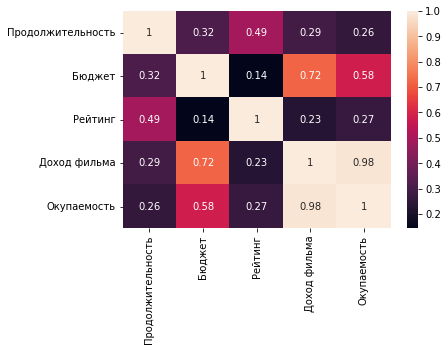

In [ ]:
crit = {'runtime':'Продолжительность', 'budget':'Бюджет','rating':'Рейтинг','revenue':'Доход фильма','Выручка':'Окупаемость'}
answer = films.columns.tolist()
list1 = []

for i in answer:
  if i in crit:
    list1.append(crit[i])
  else:
    list1.append(i)
films.columns = list1
print(list1)

cols = ['Продолжительность', 'Бюджет','Рейтинг','Доход фильма','Окупаемость']
hm = sns.heatmap(films[cols].corr(),
                 cbar=True,
                 annot=True)

In [ ]:
films=films[films['release'].notnull()]
films.isna().any()
films['release'] = films['release'].astype('string')

years=[]
for row in films['release']:
  y=int(row.split('-')[0])
  if y>2022:
    years.append(1900+y//365)
  else:
    years.append(y)
films['release'] = years

films=films[films['release']>2009]
films=films[films['release']<2022]
avg_rating = films.groupby(['release']).agg({
  "rating": "mean",
}).reset_index()


x = avg_rating['release'].tolist()
y = avg_rating['rating'].tolist()
for i in range(12):
    y[i] = round(y[i], 1)

fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=y,marker=dict(size=17) ,line=dict(width=6, color='#00fffd'),
                         text=y,textposition="top center",
                         mode="lines+markers+text",
                         textfont=dict(family="sans serif",size=16,color='black')))

fig.update_layout(
    title='Средний рейтинг по годам',
    titlefont=dict(
        size=40,
            color='#000'
    ),
    xaxis=dict(
        title='Год выхода',
        titlefont=dict(
            family='Courier New, monospace',
            size=30,
            color='#000'
        )
    ),
    yaxis=dict(
        title='Рейтинг',
        titlefont=dict(
            family='Courier New, monospace',
            size=30,
            color='#000'
        )
    )
)



fig.show()


# fig = px.line(avg_rating, x='release', y='rating',markers=True)
# fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:

avg_revenue = films.groupby(['release']).agg({
  "revenue": "mean",
}).reset_index()

# fig = px.line(avg_revenue, x='release', y='revenue',markers=True)
# fig.show()

x = avg_revenue['release'].tolist()
y = avg_revenue['revenue'].tolist()
for i in range(12):
    y[i] = round(y[i], 1)

fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=y,marker=dict(size=17) ,line=dict(width=6, color='#00fffd'),
                         text=y,textposition="top center",
                         mode="lines+markers+text",
                         textfont=dict(family="sans serif",size=16,color='black')))

fig.update_layout(
    title='Средние доходы фильмов по годам',
    titlefont=dict(
        size=40,
            color='#000'
    ),
    xaxis=dict(
        title='Год выхода',
        titlefont=dict(
            family='Courier New, monospace',
            size=30,
            color='#000'
        )
    ),
    yaxis=dict(
        title='Кассовые сборы ($)',
        titlefont=dict(
            family='Courier New, monospace',
            size=30,
            color='#000'
        )
    )
)



fig.show()


In [ ]:
avg_profit = films.groupby(['release']).agg({
  "profit": "mean",
}).reset_index()

x = avg_profit['release'].tolist()
y = avg_profit['profit'].tolist()
for i in range(12):
    y[i] = round(y[i], 1)

fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=y,marker=dict(size=17) ,line=dict(width=6, color='#00fffd'),
                         text=y,textposition="top center",
                         mode="lines+markers+text",
                         textfont=dict(family="sans serif",size=16,color='black')))

fig.update_layout(
    title='Средняя окупаемость по годам',
    titlefont=dict(
        size=40,
            color='#000'
    ),
    xaxis=dict(
        title='Год выхода',
        titlefont=dict(
            family='Courier New, monospace',
            size=30,
            color='#000'
        )
    ),
    yaxis=dict(
        title='Окупаемость',
        titlefont=dict(
            family='Courier New, monospace',
            size=30,
            color='#000'
        )
    )
    
)



fig.show()


In [ ]:
films_rus = films.query("country1 in ['Россия']")
films_rus = films_rus[films_rus['release']>2009]


films_rus=films_rus[films_rus['release']<2022]
avg_rating_rus = films_rus.groupby(['release']).agg({
  "rating": "mean",
}).reset_index()


x = avg_rating_rus['release'].tolist()
y = avg_rating_rus['rating'].tolist()
print(y)
for i in range(9):
    y[i] = round(y[i], 1)

fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=y,marker=dict(size=17) ,line=dict(width=6, color='#00fffd'),
                         text=y,textposition="top center",
                         mode="lines+markers+text",
                         textfont=dict(family="sans serif",size=16,color='black')))

fig.update_layout(
    title='Средний рейтинг по годам',
    titlefont=dict(
        size=40,
            color='#000'
    ),
    xaxis=dict(
        title='Год выхода',
        titlefont=dict(
            family='Courier New, monospace',
            size=30,
            color='#000'
        )
    ),
    yaxis=dict(
        title='Рейтинг',
        titlefont=dict(
            family='Courier New, monospace',
            size=30,
            color='#000'
        )
    )
)



fig.show()


[0.0, 6.311808367071524, 6.15, 3.5, 6.712333030766232, 6.618649335855442, 4.0191328056901785, 0.0, 2.066666666666667]
